In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# # installing necessary packages
# !pip3 install chunkdot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movie_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/rotten_tomatoes_movies.csv")
review_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/rotten_tomatoes_movie_reviews.csv")

Basic understanding on following data <br>
1- Movie data <br>
2- Review data

In [ ]:
print("Columns in Movie data : " + "\n")
print(movie_df.columns)

Columns in Movie data : 

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix'],
      dtype='object')


In [ ]:
print("Shape of movie data : ", movie_df.shape)
movie_df.head(10)

Shape of movie data :  (143258, 16)


,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN
5,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",English,Baltasar Kormákur,"Aaron Kandell,Jordan Kandell,David Branson Smith",$31.4M,STX Films,NaN
6,malta-con-huevo-scrambled-beer,Scrambled Beer,55.0,NaN,NaN,NaN,NaN,2015-10-05,88.0,Comedy,Spanish,Cristobal Valderrama,Cristobal Valderrama,NaN,NaN,NaN
7,kakabakaba-ka-ba,Kakabakaba ka ba? (Will Your Heart Beat Faster?),88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mike de Leon,NaN,NaN,NaN,NaN
8,sundowning,Sundowning,NaN,NaN,NaN,NaN,NaN,NaN,123.0,Drama,English,Jim Comas Cole,NaN,NaN,NaN,NaN
9,1035316-born_to_kill,Born to Kill,74.0,83.0,NaN,NaN,1947-04-30,2016-05-23,92.0,"Crime, Drama",English,Robert Wise,"Eve Greene,Richard Macaulay",NaN,NaN,NaN


In [ ]:
movie_df = movie_df.drop_duplicates().reset_index(drop=True)
print("Shape of movie data : ", movie_df.shape)

Shape of movie data :  (142054, 16)


In [ ]:
# Looking at the data type and missing values
df_info = pd.concat([pd.DataFrame(movie_df.dtypes), pd.DataFrame(movie_df.count())], axis=1).reset_index(drop=False)
# df_info = pd.concat(pd.DataFrame(movie_df.dtypes, columns = ['title', 'type'], pd.DataFrame(movie_df.counts(),))
n = movie_df.shape[0]
df_info.columns = ['feature', 'type', 'non_null']
df_info['non_null_percentage'] = df_info['non_null'].apply(lambda x : (x/n)*100)
df_info

,feature,type,non_null,non_null_percentage
0,id,object,142054,100.000000
1,title,object,141687,99.741648
2,audienceScore,float64,72628,51.127036
3,tomatoMeter,float64,33574,23.634674
4,rating,object,13860,9.756853
5,ratingContents,object,13860,9.756853
6,releaseDateTheaters,object,30512,21.479156
7,releaseDateStreaming,object,78730,55.422586
8,runtimeMinutes,float64,128337,90.343813
9,genre,object,131053,92.255762


In [ ]:
"""
Based on above analysis, we can drop following columns because null values are very high.
1- ratingContents
2- rating
3- releaseDateTheaters
4- releaseDateStreaming
5- boxOffice
6- distributor
7- soundMix
8- audienceScore
10- tomatoMeter

"""
movie_df.drop(columns=['ratingContents', 'releaseDateTheaters', 'releaseDateStreaming', 'rating', 'boxOffice', 'distributor', 'soundMix'], axis=1, inplace=True)


In [ ]:
print(f"no of unique movies_id : {len(np.unique(movie_df['id']))}")
print(f"no of unique movies : {len(np.unique(movie_df['title'].astype('str')))}")

### Get the title from id

In [ ]:
# replacing missing titles with id

def missingTitleTreat(row):
    if pd.isna(row['title']) == True:
        if pd.isna(row['id']) == False:
            g = row['id']
            g = g.replace("_"," ")
    else:
        g = row['title']
    return g


In [ ]:
movie_df['title'] = movie_df.apply(missingTitleTreat, axis=1)

### looking at the Null values

In [ ]:
df_info = pd.concat([pd.DataFrame(movie_df.dtypes), pd.DataFrame(movie_df.count())], axis=1).reset_index(drop=False)
n = movie_df.shape[0]
df_info.columns = ['feature', 'type', 'non_null']
df_info['non_null_percentage'] = df_info['non_null'].apply(lambda x : (x/n)*100)
df_info

,feature,type,non_null,non_null_percentage
0,id,object,142054,100.000000
1,title,object,142054,100.000000
2,audienceScore,float64,72628,51.127036
3,tomatoMeter,float64,33574,23.634674
4,runtimeMinutes,float64,128337,90.343813
5,genre,object,131053,92.255762
6,originalLanguage,object,128304,90.320582
7,director,object,137892,97.070128
8,writer,object,89367,62.910583


# Review Data Analysis

### Now we will  see the data properties of review data set in a similar manner

In [ ]:
review_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')

In [ ]:
print(review_df.shape)
review_df.head(10)

(1444963, 11)


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...
5,dangerous_men_2015,2299284,2015-12-13,Eric Melin,False,4/5,fresh,Lawrence.com,"With every new minute, there's another head-sc...",POSITIVE,http://www.lawrence.com/weblogs/scenestealers/...
6,dangerous_men_2015,2295858,2015-11-22,Matt Donato,False,7/10,fresh,We Got This Covered,"Emotionless reaction shots, zero characterizat...",POSITIVE,http://wegotthiscovered.com/movies/dangerous-m...
7,dangerous_men_2015,2295338,2015-11-19,Peter Keough,True,0.5/4,rotten,Boston Globe,"Conceivably, it could serve as a primer for st...",NEGATIVE,http://www.bostonglobe.com/arts/movies/2015/11...
8,dangerous_men_2015,2294641,2015-11-16,Jason Wilson,False,3/10,rotten,Under the Radar,"If you're not a fan of garbage cinema, even fo...",NEGATIVE,http://www.undertheradarmag.com/reviews/danger...
9,dangerous_men_2015,2294129,2015-11-12,Soren Andersen,True,0/4,rotten,Seattle Times,"""Dangerous Men,"" the picture's production note...",NEGATIVE,http://www.seattletimes.com/entertainment/movi...


In [ ]:
# removing duplicates

review_df.drop_duplicates(keep='first')
print(review_df.shape)

(1444963, 11)


In [ ]:
""" different critics can be reviewed same movie"""
""" review id is not a unique identifier of critic"""
f = review_df['reviewId'].value_counts()
f = f[f.values>1]
print(list(f.index))
print(len(list(f.index)))
reviewid_unique = review_df.drop_duplicates(subset=['reviewId'], keep = 'first')
# review_df[review_df['reviewId']==1813245]
reviewid_unique.shape


[2513610, 1294813, 1295579, 1296169, 1305154, 1311421, 1312265, 1318397, 1318865, 1321185, 1324572, 1343974, 1641075, 1813222, 1813238, 1813239, 1813245, 1813259, 1813260, 1813302, 1813381, 1295055, 1293527, 1285244, 1293525, 1285976, 1285977, 1286033, 1286404, 1286407, 1286976, 1286977, 1287800, 1287853, 1287914, 1288079, 1288507, 1288508, 1288940, 1289189, 1289632, 1290149, 1290376, 1292242, 1813393, 1813414, 1813452, 1813460, 1813724, 1813734, 1813753, 1813766, 1813853, 1813910, 1814032, 1814033, 1814037, 1814050, 1814051, 1814076, 1814178, 1814230, 1814234, 1814287, 1814318, 1814371, 1815334, 1813716, 1813713, 1813710, 1813687, 1813467, 1813472, 1813479, 1813582, 1813642, 1813665, 1813666, 1813676, 1813688, 1813708, 1813695, 1813696, 1813700, 1813701, 1813703, 1813704, 1813706, 1813707, 1285911, 1285204, 1818163, 2820468, 2822069, 2824987, 2826134, 2834090, 2834713, 2842902, 2844151, 2844576, 2847646, 2850803, 102690302, 102719594, 102735819, 2667773, 2667849, 2667876, 2667880, 266

(1432569, 11)

### Merging both data set

In [ ]:
# merging movie and review data

merge_df = pd.merge(reviewid_unique, movie_df, 'left', 'id')
print(merge_df.shape)
merge_df.head()

(1432714, 19)


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,title,audienceScore,tomatoMeter,runtimeMinutes,genre,originalLanguage,director,writer
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...,Beavers,75.0,NaN,30.0,Documentary,English,Stephen Low,NaN
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...,Blood Mask,NaN,NaN,NaN,NaN,NaN,Unknown Director,NaN
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...,City Hunter: Shinjuku Private Eyes,NaN,NaN,NaN,NaN,NaN,Kenji Kodama,NaN
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...,City Hunter: Shinjuku Private Eyes,NaN,NaN,NaN,NaN,NaN,Kenji Kodama,NaN
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...,Dangerous Men,42.0,50.0,NaN,NaN,NaN,Unknown Director,NaN


In [ ]:
merge_df.drop_duplicates(inplace=True, ignore_index=True)
merge_df.shape

(1432714, 19)

In [ ]:
# checking null values

df_info = pd.concat([pd.DataFrame(merge_df.dtypes), pd.DataFrame(merge_df.count())], axis=1).reset_index(drop=False)
n = merge_df.shape[0]
df_info.columns = ['feature', 'type', 'non_null']
df_info['non_null_percentage'] = df_info['non_null'].apply(lambda x : (x/n)*100)
df_info

,feature,type,non_null,non_null_percentage
0,id,object,1432714,100.000000
1,reviewId,int64,1432714,100.000000
2,creationDate,object,1432714,100.000000
3,criticName,object,1432714,100.000000
4,isTopCritic,bool,1432714,100.000000
5,originalScore,object,1001281,69.887012
6,reviewState,object,1432714,100.000000
7,publicatioName,object,1432714,100.000000
8,reviewText,object,1364019,95.205254
9,scoreSentiment,object,1432714,100.000000


### No of unique item in key + categorical fetaures

In [ ]:
print(f"no of unique criticName : {len(np.unique(merge_df['criticName']))}")
print(f"no of unique is top critic : {len(np.unique(merge_df['isTopCritic']))}")
print(f"no of unique reviewState : {len(np.unique(merge_df['reviewState'].astype('str')))}")
print(f"no of unique publicatioName : {len(np.unique(merge_df['publicatioName'].astype('str')))}")
print(f"no of unique scoreSentiment : {len(np.unique(merge_df['scoreSentiment'].astype('str')))}")
print(f"no of unique movies : {len(np.unique(merge_df['title'].astype('str')))}")
print(f"no of unique genre : {len(np.unique(merge_df['genre'].astype('str')))}")
print(f"no of unique originalLanguage : {len(np.unique(merge_df['originalLanguage'].astype('str')))}")
print(f"no of unique director : {len(np.unique(merge_df['director'].astype('str')))}")

no of unique criticName : 15510
no of unique is top critic : 2
no of unique reviewState : 2
no of unique publicatioName : 2707
no of unique scoreSentiment : 2
no of unique movies : 63591
no of unique genre : 2179
no of unique originalLanguage : 110
no of unique director : 32908


## Standerdising Original score <br/>
Steps: <br/>
    1- splitting ratings in numerator and denominator and ordinal (which can not be split) <br/>
    2- create a mapping of numerator and denominator for ordinal ratings (which ever is possible). <br/>
    3- standardising all ratings on the scale of 5 <br/>
    4- missing value treatment of standard score using mean of available standard score of that perticular movie

In [ ]:
ordinal_rating = merge_df['originalScore'].value_counts().reset_index()
ordinal_rating.shape

(1729, 2)

#### **Step-1:** Splitting rating in 3 columns:- Numerator, Denominator and Ordinal (rating witch can not be broken into numerator and denominator)

In [ ]:
# Function of splitting rating in numerator
def RatingNumerator(x):
    try:
        g = float(x.split("/")[0])
    except:
        g = np.nan
    return g

# Function of splitting rating in denominator
def RatingDenominator(x):
    try:
        g = float(x.split("/")[1])
    except:
        g = np.nan
    return g

# Function of extracting ordinal ratings
def RatingOrdinal(x):
    g = x.split("/")[0]
    g = np.nan
    return g


In [ ]:
# Splitting ratings in numerator, denominator and ordinal columns

merge_df['rating_nume'] = merge_df['originalScore'].apply(lambda x : RatingNumerator(x))
merge_df['rating_denom'] = merge_df['originalScore'].apply(lambda x : RatingDenominator(x))
merge_df['rating_ordinal'] = merge_df.apply(lambda row : row['originalScore'] if np.isnan(row['rating_nume']) else np.nan, axis = 1)


In [ ]:
#  Checking null values in numerator and denominator columns
nume_null_before = merge_df['rating_nume'].isna().sum()
denom_null_before = merge_df['rating_denom'].isna().sum()
print(nume_null_before)
print(denom_null_before)
print(merge_df['rating_ordinal'].isna().sum())

591690
595294
1272457


In [ ]:
"""
In above cells no. of null values are high. We can reduce it by treating ordinal ratings upto certaing extent
"""

#### **Step-2:** Creating a mapping of numerator and denominator for ordinal ratings (which ever is possible) and import in dataframe <br/>


In [ ]:
# temp = merge_df[(pd.notna(merge_df['rating_ordinal'])) & (pd.isna(merge_df['rating_denom']))]
# rating_mapping = temp['rating_ordinal'].value_counts().reset_index()
# rating_mapping.columns = ['ordinal_rating', 'count']
# print(rating_mapping)

## saving mapping file
# path = "/content/drive/MyDrive/Colab Notebooks/CapstoneProject/ratingMapping.csv"
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#     rating_mapping.to_csv(f, index = False)


In [ ]:
##********** append any left out ordinal rating into mapping csv file which is left out******
# df_temp = pd.DataFrame([['3 1/2', 3.5,5]], columns = rating_mapping.columns)
# rating_mapping = pd.concat([rating_mapping, df_temp], ignore_index=True)
# from sqlalchemy.schema import DropIndex
# path = "/content/drive/MyDrive/Colab Notebooks/CapstoneProject/ratingMapping.csv"
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#     rating_mapping.to_csv(f, index = False)

In [ ]:
# Exporting mapping of ordinal rating file created manually and get mapped numerator and denominator

rating_mapping = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/ratingMapping.csv")
dict_rating_nume = pd.Series(rating_mapping['num'].values, index = rating_mapping['rating']).to_dict()
dict_rating_denom = pd.Series(rating_mapping['Denom'].values, index = rating_mapping['rating']).to_dict()

In [ ]:
# Creating functions to import numerator and denominator values from mapping into dataframe

#  function of getting denominator values from mapping
def getDenom(row):
    g = row['rating_ordinal']
    if (pd.notna(g)) & (g in dict_rating_denom.keys()):
        denom = dict_rating_denom[g]
    else:
        denom = row['rating_denom']
    return denom

#  function of getting numerator values from mapping
def getNume(row):
    g = row['rating_ordinal']
    if (pd.notna(g)) & (g in dict_rating_nume.keys()):
        nume = dict_rating_nume[g]
    else:
        nume = row['rating_nume']
    return nume

In [ ]:
# appying function to get numerator and denominator
merge_df['rating_denom'] = merge_df.apply(lambda row : getDenom(row), axis = 1)
merge_df['rating_nume'] = merge_df.apply(lambda row : getNume(row), axis = 1)

In [ ]:
# analysing number of null values we have filled after ordinal rating treatment

nume_null_after = merge_df['rating_nume'].isna().sum()
denom_null_after = merge_df['rating_denom'].isna().sum()

print("Number of null values filled in numerator column after ordinal rating treatment : ", nume_null_before - nume_null_after)
print("Number of null values filled in denominator column after ordinal rating treatment : ", denom_null_before - denom_null_after)

print('*********************************************************************************************************************')
print("non null values in numerator columns : ", merge_df['rating_nume'].notna().sum())
print("non null values in denominator columns : ", merge_df['rating_denom'].notna().sum())

Number of null values filled in numerator column after ordinal rating treatment :  160204
Number of null values filled in denominator column after ordinal rating treatment :  160166
*********************************************************************************************************************
non null values in numerator columns :  1001228
non null values in denominator columns :  997586


In [ ]:
merge_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl', 'title', 'audienceScore', 'tomatoMeter',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'rating_nume', 'rating_denom', 'rating_ordinal'],
      dtype='object')

#### **Step-3:** Standardising all ratings on the scale of 5

In [ ]:
def standardise_rating(row):
    if row['rating_denom']==0.0:
        g = np.nan
    elif pd.isna(row['rating_denom']):
        g = np.nan
    else:
        g = (row['rating_nume'] / row['rating_denom'])*5
    return g

In [ ]:
merge_df['standard _rating'] = merge_df.apply(standardise_rating, axis=1)

In [ ]:
stndrd_null_before = merge_df['standard _rating'].isna().sum()
stndrd_nonNull_before = merge_df['standard _rating'].notna().sum()

print("Non null values in standard rating : ",stndrd_nonNull_before)
print("Null values in standard rating : ",stndrd_null_before)

Non null values in standard rating :  997576
Null values in standard rating :  435138


In [ ]:
merge_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl', 'title', 'audienceScore', 'tomatoMeter',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'rating_nume', 'rating_denom', 'rating_ordinal', 'standard _rating'],
      dtype='object')

#### **Step-4:** Missing value treatment of standard score using mean of available standard score of that perticular movie

In [ ]:
"""
creating a 3 dictionary of mean score
1- a simple dict with mean score as value of each movie as key irrespective of sentiment
2- a dict with mean score based on positive sentiment with mean score as value of each movie as key.
3- a dict with mean score based on negative sentiment with mean score as value of each movie as key.

"""

#  dict of mean score of each movie
dict_meanScore = merge_df.groupby(['title'])['standard _rating'].mean().to_dict()
dict_meanScore = {k:v for k,v in dict_meanScore.items() if pd.notna(v)}

#  datframe of mean scroe of each movie based on the score sentiment
sentimentMeanScore = merge_df.groupby(['title', 'scoreSentiment'])['standard _rating'].mean().reset_index()
sentimentMeanScore.set_index('title', inplace = True)
# titleWiseMeanScore

# creating a dict with mean score based on positive sentiment with mean score as value of each movie as key
dict_positiveMeanScore = sentimentMeanScore[sentimentMeanScore['scoreSentiment']=='POSITIVE']['standard _rating'].to_dict()
dict_positiveMeanScore = {k:v for k,v in dict_positiveMeanScore.items() if pd.notna(v)}
# dict_positiveMeanScore

# creating a dict with mean score based on positive sentiment with mean score as value of each movie as key
dict_negativeMeanScore = sentimentMeanScore[sentimentMeanScore['scoreSentiment']=='NEGATIVE']['standard _rating'].to_dict()
dict_negativeMeanScore = {k:v for k,v in dict_negativeMeanScore.items() if pd.notna(v)}
# dict_negativeMeanScore

In [ ]:
#  creating a function to fetch the mean score from above created dict if standard _rating is null for the title

def fillMeanRating(row):
    g = row['title']

    if (row['scoreSentiment'] == 'POSITIVE') & (pd.isna(row['standard _rating'])) & (g in dict_positiveMeanScore.keys()): # # if score sentiment is positive if standard _rating is null and title in dict_positiveMeanScore
        meanRating = dict_positiveMeanScore[g]
    elif (row['scoreSentiment'] == 'NEGATIVE') & (pd.isna(row['standard _rating'])) & (g in dict_negativeMeanScore.keys()): # if standard _rating is null and title in dict_positiveMeanScore
        meanRating = dict_negativeMeanScore[g]
    elif (pd.isna(row['standard _rating'])) & (g in dict_meanScore.keys()):
        meanRating = dict_meanScore[g]
    else:
        meanRating = row['standard _rating']
    return meanRating


In [ ]:
# applying custom function of filling na in df

merge_df['standard _rating'] = merge_df.apply(fillMeanRating, axis=1)

In [ ]:
stndrd_null_after = merge_df['standard _rating'].isna().sum()
stndrd_nonNull_after = merge_df['standard _rating'].notna().sum()

print("Non null values in standard rating : ",stndrd_nonNull_after)
print("Null values in standard rating : ",stndrd_null_after)
print('***********************************************************************************')
print("treated null values of standard rating columns : ", stndrd_null_before - stndrd_null_after)

Non null values in standard rating :  1419282
Null values in standard rating :  13432
***********************************************************************************
treated null values of standard rating columns :  421706


In [ ]:
# removing all records where standard_rating is either 0 or more than 5 or less than 0 or null

merge_df = merge_df[merge_df['standard _rating']!=0]
merge_df = merge_df[pd.notna(merge_df['standard _rating'])]
merge_df = merge_df[(merge_df['standard _rating']<=5) & (merge_df['standard _rating']>=0)]
merge_df.reset_index(drop = True, inplace = True)
merge_df.shape

(1413433, 23)

### Post preprocessing and transformation of columns

In [ ]:

df_info = pd.concat([pd.DataFrame(merge_df.dtypes), pd.DataFrame(merge_df.count())], axis=1).reset_index(drop=False)
n = merge_df.shape[0]
print(n)
df_info.columns = ['feature', 'type', 'non_null']
df_info['non_null_percentage'] = df_info['non_null'].apply(lambda x : (x/n)*100)
df_info


1413433


,feature,type,non_null,non_null_percentage
0,id,object,1413433,100.000000
1,reviewId,int64,1413433,100.000000
2,creationDate,object,1413433,100.000000
3,criticName,object,1413433,100.000000
4,isTopCritic,bool,1413433,100.000000
5,originalScore,object,995522,70.432911
6,reviewState,object,1413433,100.000000
7,publicatioName,object,1413433,100.000000
8,reviewText,object,1345712,95.208758
9,scoreSentiment,object,1413433,100.000000


In [ ]:
merge_df['standard _rating'] = merge_df['standard _rating'].astype(int)
merge_df['standard _rating'].dtype

dtype('int64')

In [ ]:
# convering 'creationDate' in date time format and extarct day, month and year info

merge_df['creationDate'] = pd.to_datetime(merge_df['creationDate'],format = '%Y-%m-%dT', errors = 'coerce')
merge_df['creation_year'] = merge_df['creationDate'].dt.year
merge_df['creation_month'] = merge_df['creationDate'].dt.month
merge_df['creation_day'] = merge_df['creationDate'].dt.day

In [ ]:
def create_era(x):
    if x < 1851:
        era = 'early_to_mid-19s'
    elif (x < 1901) & (x >= 1851):
        era = 'mid_to_late-19s'
    elif (x < 1951) & (x >= 1901):
        era = 'early_to_mid-20s'
    elif (x < 2001) & (x >= 1951):
        era = 'mid_to_late-20s'
    else:
        era = '21st'
    return era

In [ ]:
merge_df['creation_era'] = merge_df['creation_year'].apply(lambda x : create_era(x))

In [ ]:
merge_df['creation_era'].value_counts()

21st                1364557
mid_to_late-20s       48763
early_to_mid-19s         70
early_to_mid-20s         43
Name: creation_era, dtype: int64

In [ ]:
merge_df['first_genre'] = merge_df['genre'].apply(lambda x : x.split(",")[0] if pd.notna(x) else x)

In [ ]:
print(len(merge_df['first_genre'].unique()))
# print(len(str(merge_df['reviewId'])).unique())
print(len(merge_df['reviewId'].unique()))
len(merge_df['criticName'].unique())

28
1413288


15212

In [ ]:
# merge_df.to_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/merge_df.csv', index = False)

## Univariate analysis

In [ ]:
# temp = merge_df.copy(deep=True)

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/merge_df.csv')

In [ ]:
## removing all those columns which are not required

temp = temp.drop(columns = ['id', 'originalScore','rating_nume', 'rating_denom', 'rating_ordinal', 'creation_month', 'creation_day'])


<BarContainer object of 4 artists>

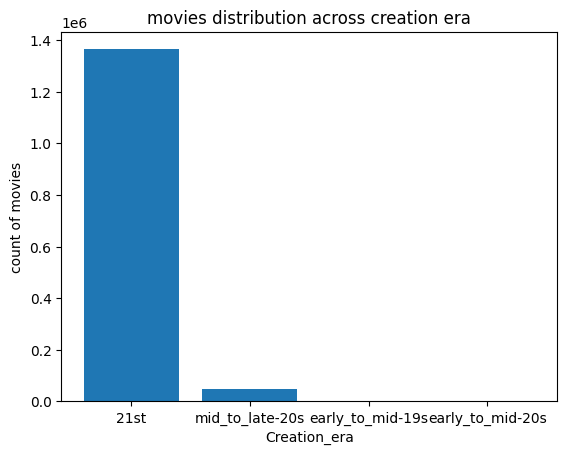

In [ ]:
f = merge_df['creation_era'].value_counts().reset_index()
f.columns = ['creation_era','count']
plt.title('movies distribution across creation era')
plt.xlabel('Creation_era')
plt.ylabel('count of movies')

plt.bar(f['creation_era'], f['count'])

[Text(0.5, 0, 'scoreSentiment'), Text(0, 0.5, 'count of movies')]

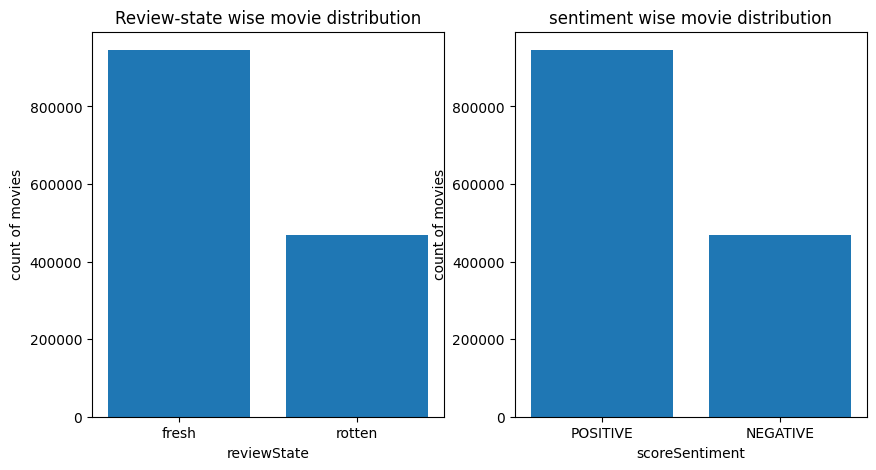

In [ ]:
f = merge_df['reviewState'].value_counts().reset_index()
f.columns = ['reviewState', 'count']
g = merge_df['scoreSentiment'].value_counts().reset_index()
g.columns = ['scoreSentiment', 'count']

fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].bar(f['reviewState'], f['count'])
axs[0].set_title('Review-state wise movie distribution')
axs[0].set(xlabel='reviewState', ylabel='count of movies')
# axs[0].set_ylabel('count of movies')

axs[1].bar(g['scoreSentiment'], g['count'])
axs[1].set_title('sentiment wise movie distribution')
axs[1].set(xlabel='scoreSentiment', ylabel='count of movies')
# axs[1].set_xlabel('common xlabel')()
# axs[1].set_ylabel('count of movies')
# merge_df[['reviewState', 'scoreSentiment']].value_counts() #.plot(kind = 'bar', subplot=True,figsize = (5,5))

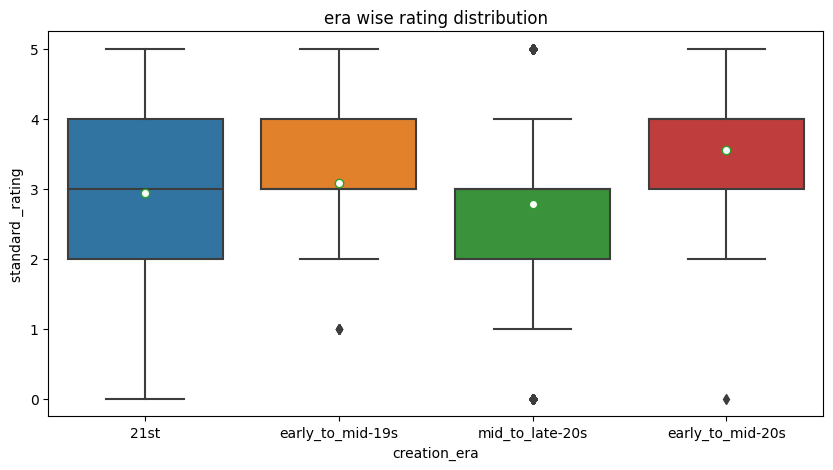

In [ ]:
temp2 = merge_df[['audienceScore', 'tomatoMeter', 'standard _rating', 'creation_era', 'first_genre']]
plt.figure(figsize=(10,5))
sns.boxplot(x = 'creation_era', y= 'standard _rating', data=temp2, showmeans=True, meanprops = {"marker":"o", "markerfacecolor":"white"}).set(title='era wise rating distribution')
plt.show()

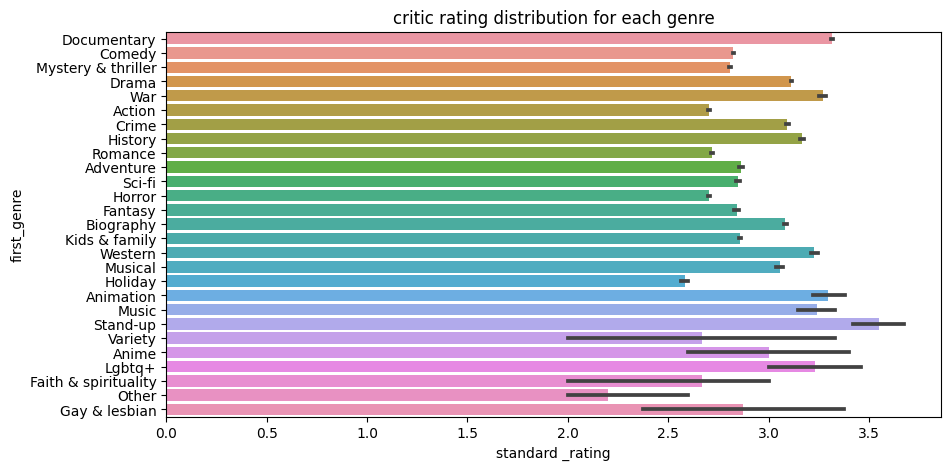

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x='standard _rating', y = 'first_genre', data=temp2).set(title='critic rating distribution for each genre')
# plt.show()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

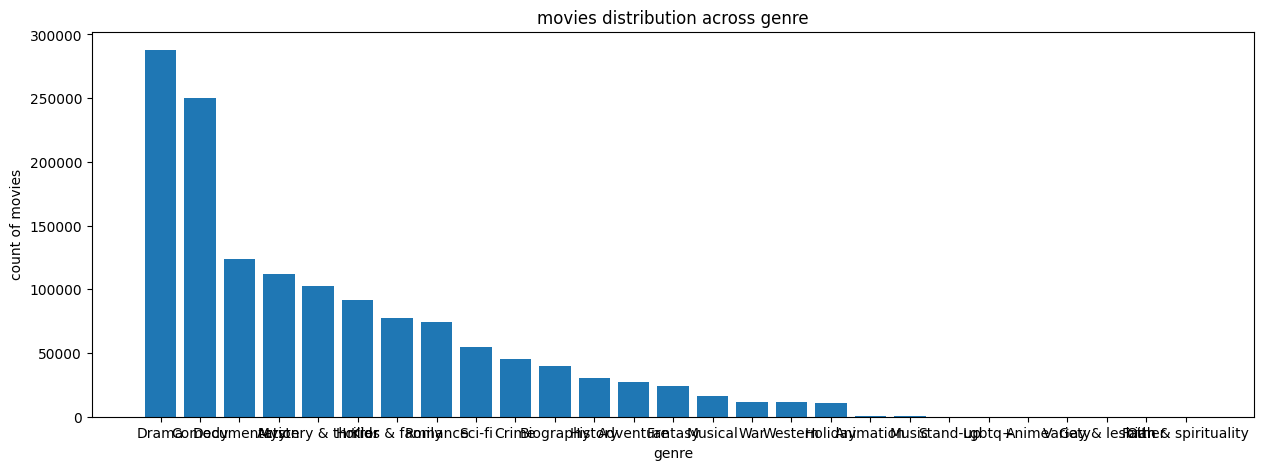

In [ ]:
count = temp2['first_genre'].value_counts()
plt.figure(figsize = (15,5))
plt.bar(count.index, count.values)
plt.title('movies distribution across genre')
plt.xlabel('genre')
plt.ylabel('count of movies')
plt.show

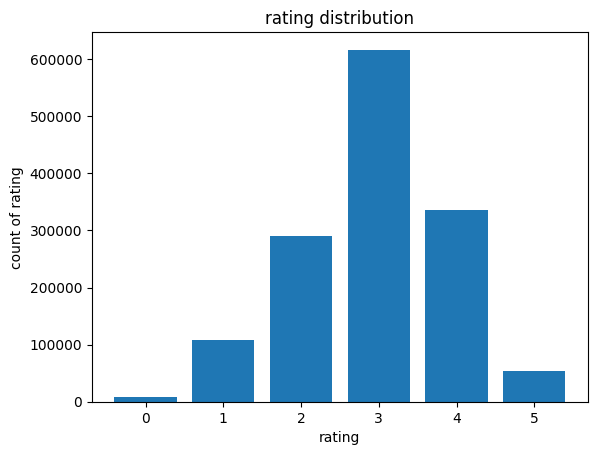

In [ ]:
# plt.figure(figsize = (10,5))
count = temp2['standard _rating'].value_counts()
plt.bar(count.index, count.values)
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('count of rating')
plt.show()

## Content based filtering

In [ ]:
# !pip install chunkdot

#### Importing packages

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(merge_df.shape)
merge_df.columns

(1413433, 28)


Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl', 'title', 'audienceScore', 'tomatoMeter',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'rating_nume', 'rating_denom', 'rating_ordinal', 'standard _rating',
       'creation_year', 'creation_month', 'creation_day', 'creation_era',
       'first_genre'],
      dtype='object')

#### missing value treatment and merging all required text column to create tfidf vectors

In [ ]:
content_df = merge_df.fillna(" ")
content_df.shape

(1413433, 28)

In [ ]:
content_df['text'] = content_df['publicatioName'] + " " + content_df['reviewText'] + " " + content_df['director'] + " " + content_df['writer']

In [ ]:
#  dropping null values
content_df.dropna(subset = 'text', inplace=True)
# droping duplicate titles
content_df.drop_duplicates(subset = 'title', inplace = True)
content_df.shape

(54531, 29)

In [ ]:
content_df.reset_index(drop=True,inplace=True)

In [ ]:
# content_df.to_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/content_df_interim.csv", index=False)
content_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/content_df_interim.csv")
content_df['title']

0                                   Beavers
1                                Blood Mask
2        City Hunter: Shinjuku Private Eyes
3                             Dangerous Men
4                      Small Town Wisconsin
                        ...                
54526                      Sex and the City
54527              the huntsman winters war
54528                Catherine Called Birdy
54529                             Nomadland
54530                Thor: Love and Thunder
Name: title, Length: 54531, dtype: object

#### transform text in vectors using tf_idf vetorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(ngram_range=(1,2))

#### creating a matrix of vectors of each text

In [ ]:
tf_idf_matrix = tf.fit_transform(content_df['text'])

In [ ]:
print("no of documents in corpus : ",content_df.shape[0])
print("no of tokens in corpus : ",len(tf.vocabulary_))
print("tfidf_matrix shape : ", tf_idf_matrix.shape)

no of documents in corpus :  54531
no of tokens in corpus :  686309
tfidf_matrix shape :  (54531, 686309)


In [ ]:
# !pip install chunkdot

In [ ]:
import pickle
from chunkdot import cosine_similarity_top_k

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/tf_idf_matrix.pkl', 'wb') as f:
#     pickle.dump(tf_idf_matrix, f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/tf_idf_matrix.pkl', 'rb') as f:
    tf_idf_matrix = pickle.load(f)
tf_idf_matrix.shape

(54531, 703026)

#### Calculate the cosine similarity of each text vector against other text vector. This will create matrix of n*n where n = no of text documennt

In [ ]:
try:
    del cosine_sim_top11   # to delete this variable so that environment is not dead as this matrix is very big
except:
    pass
cosine_sim_top11 = cosine_similarity_top_k(tf_idf_matrix, 11)

In [ ]:
cosine_sim_top11.shape

(54531, 54531)

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/cosine_sim_top11.pkl', 'wb') as f:
#     pickle.dump(cosine_sim_top11, f)

In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/cosine_sim_top11.pkl', 'rb') as f:
#     cosine_sim_top11 = pickle.load(f)
# cosine_sim_top11.shape

(54531, 54531)

In [ ]:
content_df.columns

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl', 'title', 'audienceScore', 'tomatoMeter',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'rating_nume', 'rating_denom', 'rating_ordinal', 'standard _rating',
       'creation_year', 'creation_month', 'creation_day', 'creation_era',
       'first_genre', 'text'],
      dtype='object')

In [ ]:
movieMetadata_df = content_df[['title', 'audienceScore', 'runtimeMinutes', 'genre', 'originalLanguage','director','publicatioName']]

In [ ]:
# import pandas as pd
movie_index = pd.Series(movieMetadata_df.index, index = movieMetadata_df['title'])

In [ ]:
def recommend_movies_content(movie_name):
    indx = movie_index[movie_name]
    top_11_similar_index = list(cosine_sim_top11[indx][0].nonzero()[1])
    top_10_movie_indx = [i for i in top_11_similar_index if i != indx]
    return movieMetadata_df.loc[top_10_movie_indx,:]

In [ ]:
recommend_movies_content('Dangerous Men')

,title,audienceScore,runtimeMinutes,genre,originalLanguage,director,publicatioName
41072,Chris Botti & Friends - Night Sessions: Live i...,,,,,Unknown Director,EmanuelLevy.Com
15254,Deep Purple - In Concert with the London Symph...,,,,,Unknown Director,EmanuelLevy.Com
16136,Rollercoaster,,,,,Unknown Director,EmanuelLevy.Com
4553,U2 - Elevation: Live from Boston,,,,,Unknown Director,EmanuelLevy.Com
43234,Catherine Wheel,,,,,Unknown Director,Dennis Schwartz Movie Reviews
37332,Sealab 2020,,,,,Unknown Director,EmanuelLevy.Com
20703,Filming 'Othello',100.0,,,,Unknown Director,Winnipeg Free Press
18466,Surprise,48.0,,"Action, Comedy",Chinese,,NYC Movie Guru
8189,Humanoid,,,,,Unknown Director,EmanuelLevy.Com
50478,Satan's Black Wedding,17.0,,,,Unknown Director,EmanuelLevy.Com


## End of content based recommendation

## Popularity based recommendation system

In [ ]:
popularity_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/merge_df.csv')

In [ ]:
popularity_df = popularity_df[['title', 'runtimeMinutes', 'genre', 'originalLanguage','director','publicatioName', 'audienceScore', 'standard _rating', 'scoreSentiment']]
popularity_df.shape

(1413433, 9)

In [ ]:
popularity_df = popularity_df.sort_values(by = ['standard _rating'], ascending = False)
popularity_df.reset_index(drop=True, inplace=True)
print(popularity_df.shape)
popularity_df.head(10)

(54530, 9)


,title,runtimeMinutes,genre,originalLanguage,director,publicatioName,audienceScore,standard _rating,scoreSentiment
0,The Miracle Of The Wolves,NaN,NaN,NaN,Raymond Bernard,La Vanguardia (Spain),NaN,5,POSITIVE
1,The Perils of Pauline,98.0,Comedy,English,"Herbert B. Leonard,Joshua Shelley",Filmsite,20.0,5,POSITIVE
2,Humpback Whales,40.0,Documentary,English,Greg MacGillivray,"Quad City Times (Davenport, IA)",85.0,5,POSITIVE
3,Diary of a Lost Girl,96.0,Drama,NaN,Georg Wilhelm Pabst,Chicago Sun-Times,88.0,5,POSITIVE
4,The Last Dragon,109.0,Action,English,Michael Schultz,Medium Popcorn,86.0,5,POSITIVE
5,The Thief and the Cobbler,72.0,"Kids & family, Action, Adventure, Comedy, Fant...",English,Richard Williams,615 Film,74.0,5,POSITIVE
6,Twilight: Los Angeles,90.0,Drama,English,Marc Levin,New York Magazine/Vulture,NaN,5,POSITIVE
7,Bamboozled,135.0,"Comedy, Drama",English,Spike Lee,Deep Focus Review,74.0,5,POSITIVE
8,Whose Life Is It Anyway?,118.0,Drama,English,John Badham,Philadelphia Gay News,79.0,5,POSITIVE
9,Tabloid,88.0,Documentary,English,Errol Morris,Deep Focus Review,72.0,5,POSITIVE


In [ ]:
# recommending popular movies excluding the movie which user has already watched

def recommend_movies_popularity(watched_movie_list):
    top_n_movies = popularity_df.head(10+len(watched_movie_list))
    # top_n_movie_list = list(top_n_movies['title'])
    top_10_movies = top_n_movies[~top_n_movies['title'].isin(watched_movie_list)].head(10).reset_index(drop=True)

    return top_10_movies

In [ ]:
recommend_movies_popularity(['3 Dev Adam', 'La Traviata'])

,title,runtimeMinutes,genre,originalLanguage,director,publicatioName,audienceScore,standard _rating,scoreSentiment
0,The Miracle Of The Wolves,NaN,NaN,NaN,Raymond Bernard,La Vanguardia (Spain),NaN,5,POSITIVE
1,The Perils of Pauline,98.0,Comedy,English,"Herbert B. Leonard,Joshua Shelley",Filmsite,20.0,5,POSITIVE
2,Humpback Whales,40.0,Documentary,English,Greg MacGillivray,"Quad City Times (Davenport, IA)",85.0,5,POSITIVE
3,Diary of a Lost Girl,96.0,Drama,NaN,Georg Wilhelm Pabst,Chicago Sun-Times,88.0,5,POSITIVE
4,The Last Dragon,109.0,Action,English,Michael Schultz,Medium Popcorn,86.0,5,POSITIVE
5,The Thief and the Cobbler,72.0,"Kids & family, Action, Adventure, Comedy, Fant...",English,Richard Williams,615 Film,74.0,5,POSITIVE
6,Twilight: Los Angeles,90.0,Drama,English,Marc Levin,New York Magazine/Vulture,NaN,5,POSITIVE
7,Bamboozled,135.0,"Comedy, Drama",English,Spike Lee,Deep Focus Review,74.0,5,POSITIVE
8,Whose Life Is It Anyway?,118.0,Drama,English,John Badham,Philadelphia Gay News,79.0,5,POSITIVE
9,Tabloid,88.0,Documentary,English,Errol Morris,Deep Focus Review,72.0,5,POSITIVE


## End of popularity based recommendation system

## Collaborative Filtering

In [ ]:
# !pip install scikit-surprise

### Creating and storing dataframe for collaborative filtering

In [ ]:
# merge_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/merge_df.csv')
# collab_df = merge_df[['criticName', 'title', 'standard _rating', 'runtimeMinutes', 'genre', 'originalLanguage','director','publicatioName', 'audienceScore','scoreSentiment', 'creation_era', 'creation_year']]
# collab_df = collab_df[collab_df['title'].notna()]
# collab_df.info()
# collab_df.to_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/collab_df.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle

from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import cross_validate
# from surprise.model_selection import train_test_split

In [ ]:
collab_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CapstoneProject/collab_df.csv')

In [ ]:
# collab_df = collab_df[~collab_df['creation_era'].isin(['early_to_mid-19s', 'early_to_mid-20s'])]
collab_df['creation_era'].value_counts()

21st                1364328
mid_to_late-20s       48763
early_to_mid-19s         70
early_to_mid-20s         43
Name: creation_era, dtype: int64

#### encoding title and crtic name to generate unique ID

In [ ]:
le = LabelEncoder()
collab_df['criticName_encode'] = le.fit_transform(collab_df['criticName'])
collab_df['title_encode'] = le.fit_transform(collab_df['title'])

#### creating dict to map exch unique id as key and name (title and critic name) as value

In [ ]:
criticName_id_dict = {k:v for (k,v) in enumerate(le.fit(collab_df['criticName']).classes_) }
titleName_id_dict = {k:v for (k,v) in enumerate(le.fit(collab_df['title']).classes_) }
unique_movie_id = list(titleName_id_dict.keys())

#### Creting temporary dataframe with columns to be used in model

In [ ]:
temp_df = collab_df[['title_encode', 'criticName_encode', 'standard _rating','creation_year']]

In [ ]:
#  removing duplicates from temp_df
print(temp_df.shape)
temp_df = temp_df.drop_duplicates(subset = ['title_encode', 'criticName_encode','standard _rating'])
print(temp_df.shape)


(1413204, 4)
(1405817, 4)


#### splitting train and test data based on time period

In [ ]:
train = temp_df[temp_df['creation_year']<=2019]
test = temp_df[temp_df['creation_year']>2019]
train.reset_index(drop=True, inplace = True)
test.reset_index(drop=True, inplace = True)
print("train shape : ", train.shape, ", test shape : ", test.shape)

train shape :  (1120087, 4) , test shape :  (285730, 4)


### prdicting scores with Surprise library

In [ ]:
# Get minimum and maximum rating from the dataset to use for scale arguement
min_rating = temp_df['standard _rating'].min()
max_rating = temp_df['standard _rating'].max()

In [ ]:
# creating reader object to create data to be used with surprise
reader = Reader(rating_scale=(min_rating, max_rating)) # create an object of reader which is used to create dataset to be compatible with Surprise
data = Dataset.load_from_df(temp_df[['criticName_encode', 'title_encode', 'standard _rating']], reader)  # creating surprise data set

#### Using SVD class library for collaborative filtering

In [ ]:
# We'll use the famous SVD algorithm.
svd = SVD(n_factors=10, n_epochs=10)
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.7379  0.7391  0.7409  0.7415  0.7424  0.7417  0.7434  0.7401  0.7398  0.7403  0.7407  0.0015  
MAE (testset)     0.5663  0.5664  0.5676  0.5682  0.5676  0.5682  0.5701  0.5683  0.5671  0.5678  0.5677  0.0010  
Fit time          12.68   18.77   13.70   13.37   12.44   13.45   13.43   12.55   13.47   14.78   13.86   1.76    
Test time         1.97    3.05    1.89    1.82    2.50    2.05    1.90    2.28    1.81    2.38    2.16    0.38    


#### Creating train and test data set for training and testing model

In [ ]:
# data = Dataset.load_from_df(temp_df[['criticName_encode', 'title_encode', 'standard _rating']], reader)
train_data = Dataset.load_from_df(train[['criticName_encode', 'title_encode', 'standard _rating']], reader)
train_Dataset = train_data.build_full_trainset()
trainset = [train_data.df.loc[i].to_list() for i in range(len(train_data.df))]   # this format is used for prediction and to check train accuracy
test_data = Dataset.load_from_df(test[['criticName_encode', 'title_encode', 'standard _rating']], reader)
testset = [test_data.df.loc[i].to_list() for i in range(len(test_data.df))]   # list of list of critic_id, title_id and score
testset[:5]

[[11788, 36876, 3],
 [14390, 36876, 3],
 [14032, 36876, 4],
 [14176, 36876, 3],
 [12473, 36876, 3]]

In [ ]:
# creating the unique list of crtic name and movie title
criticName = le.inverse_transform(collab_df['criticName_encode'])
title = le.inverse_transform(collab_df['title_encode'])


In [ ]:
# Train the algorithm on the trainset and check the accuracy
svd.fit(train_Dataset)
train_predict = svd.test(trainset)
print(train_predict[1].est)
accuracy.rmse(train_predict, verbose=True)

1.6352034725080664
RMSE: 0.6879


0.687865067182475

In [ ]:
prediction = svd.test(testset)
accuracy.rmse(prediction, verbose=True)

RMSE: 0.8350


0.8349563933711618

In [ ]:
print(criticName_id_dict[11516])
titleName_id_dict[45987]

Pat Padua


'The Passion of Joan of Arc'

In [ ]:
def generate_recommendation(model, user_id, ratings_df, n_items):
   # Get a list of all movie IDs from dataset
#    movie_ids = ratings_df["movieId"].unique()

   # Get a list of all movie IDs that have been watched by user
   movie_ids_user = ratings_df.loc[ratings_df['criticName_encode'] == user_id, 'title_encode']
    # Get a list off all movie IDS that that have not been watched by user
   movie_ids_to_pred = np.setdiff1d(unique_movie_id, movie_ids_user)

   # Apply a rating of 4 to all interactions (only to match the Surprise dataset format)
   test_set = [[user_id, movie_id, 4] for movie_id in movie_ids_to_pred]

   # Predict the ratings and generate recommendations
   predictions = model.test(test_set)
   pred_ratings = np.array([pred.est for pred in predictions])
   print("Top {0} item recommendations for user {1}:".format(n_items, user_id))
   print("**************************************************************************")
   # Rank top-n movies based on the predicted ratings
   top_n_pred = get_top_n(predictions, n_items)  # return lists of list of predicted_score, user_id and item_id for top n prediction
   for i in top_n_pred:
    #    movie_id = movie_ids_to_pred[i]
       print(titleName_id_dict[i[2]], "---(estimated score for the movie : ", int(i[0]), ")--")


# define which user ID that we want to give recommendation
userID = 14176
# define how many top-n movies that we want to recommend
n_items = 10
# generate recommendation using the model that we have trained
generate_recommendation(svd,userID,temp_df,n_items)

Top 10 item recommendations for user 14176:
**************************************************************************
Parasite ---(estimated score for the movie :  4 )--
Chinatown ---(estimated score for the movie :  4 )--
Seven Samurai ---(estimated score for the movie :  4 )--
Alien ---(estimated score for the movie :  4 )--
Goodfellas ---(estimated score for the movie :  4 )--
Grand Illusion ---(estimated score for the movie :  4 )--
The 400 Blows ---(estimated score for the movie :  4 )--
Tokyo Story ---(estimated score for the movie :  4 )--
Casablanca ---(estimated score for the movie :  4 )--
Badlands ---(estimated score for the movie :  4 )--
